In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

/home/paresh/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [18]:
# Data Preparation
data = [[[(i + j) / 100] for i in range(5)] for j in range(100)]
target = [(i + 5) / 100 for i in range(100)]

data = np.array(data, dtype=float)
target = np.array(target, dtype=float)

In [19]:
data.shape

(100, 5, 1)

In [20]:
target.shape

(100,)

In [21]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.2, random_state=4)

In [31]:
# RNN Model
model = Sequential()
model.add(LSTM((1), batch_input_shape=(None, 5, 1), return_sequences=True))
model.add(LSTM((1), return_sequences=False))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 5, 1)              12        
_________________________________________________________________
lstm_4 (LSTM)                (None, 1)                 12        
Total params: 24
Trainable params: 24
Non-trainable params: 0
_________________________________________________________________


In [32]:
history = model.fit(xtrain, ytrain, epochs=400, validation_data=(xtest, ytest))

Train on 80 samples, validate on 20 samples
Epoch 1/400
80/80 [==============================] - 1s 14ms/step - loss: 0.6716 - acc: 0.0000e+00 - val_loss: 0.5391 - val_acc: 0.0000e+00
Epoch 2/400
80/80 [==============================] - 0s 998us/step - loss: 0.6655 - acc: 0.0000e+00 - val_loss: 0.5330 - val_acc: 0.0000e+00
Epoch 3/400
80/80 [==============================] - 0s 638us/step - loss: 0.6591 - acc: 0.0000e+00 - val_loss: 0.5268 - val_acc: 0.0000e+00
Epoch 4/400
80/80 [==============================] - 0s 777us/step - loss: 0.6526 - acc: 0.0000e+00 - val_loss: 0.5207 - val_acc: 0.0000e+00
Epoch 5/400
80/80 [==============================] - 0s 652us/step - loss: 0.6461 - acc: 0.0000e+00 - val_loss: 0.5146 - val_acc: 0.0000e+00
Epoch 6/400
80/80 [==============================] - 0s 681us/step - loss: 0.6397 - acc: 0.0000e+00 - val_loss: 0.5087 - val_acc: 0.0000e+00
Epoch 7/400
80/80 [==============================] - 0s 675us/step - loss: 0.6335 - acc: 0.0000e+00 - val_loss:

In [33]:
results = model.predict(xtest)

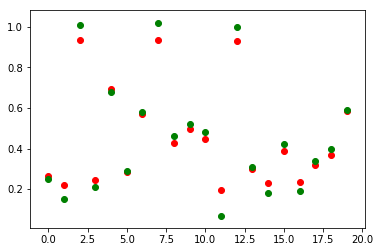

In [34]:
plt.scatter(range(20), results, c='r')
plt.scatter(range(20), ytest, c='g')

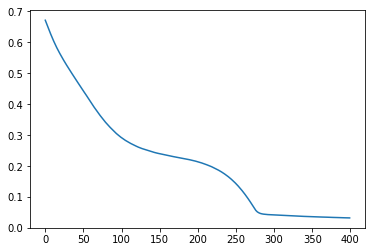

In [35]:
plt.plot(history.history['loss'])
plt.show()